# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

## Regression Model Evaluation

In [3]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
houses = LinearRegression()
houses.fit(X_train,y_train)

LinearRegression()

In [7]:
print(houses.intercept_)
print(houses.coef_)

[38.10969052]
[[-1.08651284e-01  5.27798676e-02  6.74732560e-02  3.77447325e+00
  -2.03020453e+01  3.76103706e+00  5.58116591e-03 -1.50027494e+00
   3.21697277e-01 -1.24734154e-02 -9.57997434e-01  8.89479581e-03
  -5.72729219e-01]]


In [8]:

y_train_pred= houses.predict(X_train)
y_test_pred= houses.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [9]:
from sklearn.metrics import r2_score

r_score_train=r2_score(y_train, y_train_pred)
r_score_test=r2_score(y_test, y_test_pred)

In [10]:
print(r_score_train)
print(r_score_test)

0.7326874535662113
0.7629879542810111


## 4. Calculate and print mean squared error for both the training and the testing set.

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [12]:

mean_squared_train=mean_squared_error(y_train, y_train_pred)
mean_squared_test=mean_squared_error(y_test, y_test_pred)

In [13]:
print(mean_squared_train)
print(mean_squared_test)

23.056795060663823
18.28268662184853


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [15]:
mean_absolute_train=mean_absolute_error(y_train, y_train_pred)
mean_absolute_test=mean_absolute_error(y_test, y_test_pred)

In [16]:
print(mean_absolute_train)
print(mean_absolute_test)

3.3893094295723314
3.1581396288113956


## Classification Model Evaluation

In [24]:
from sklearn.datasets import load_iris

data = load_iris()

Xdos = pd.DataFrame(data["data"], columns=data["feature_names"])
ydos = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([Xdos, ydos], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [25]:
X_traindos, X_testdos, y_traindos, y_testdos = train_test_split(Xdos,ydos,test_size= .2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [26]:
log_fitdos= LogisticRegression(solver='lbfgs', max_iter=10000)
log_fitdos.fit(X_traindos,y_traindos)

LogisticRegression(max_iter=10000)

In [27]:
y_pred_testdos= log_fitdos.predict(X_testdos)

In [28]:
y_pred_traindos= log_fitdos.predict(X_traindos)

In [29]:
print(y_pred_testdos)

[1 1 1 0 0 2 2 1 2 0 1 2 2 2 2 1 2 1 1 0 2 1 0 1 1 0 1 1 0 1]


In [30]:
print(y_pred_traindos)

[0 1 0 2 2 1 0 2 0 1 0 0 2 0 0 2 1 2 1 2 2 2 2 0 2 2 0 0 0 0 2 2 0 0 1 2 0
 2 0 1 0 1 0 2 1 1 2 2 1 1 1 2 1 0 1 1 1 0 1 1 1 2 0 2 1 1 1 2 0 0 0 0 0 2
 0 0 1 1 2 2 0 0 1 1 2 0 1 2 0 0 2 1 0 2 2 0 2 2 1 0 2 2 0 1 2 0 0 2 0 1 2
 0 2 2 2 2 2 1 0 2]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [31]:
acurracy_train=accuracy_score(y_traindos, y_pred_traindos)
acurracy_test=accuracy_score(y_testdos, y_pred_testdos)

In [32]:
print(acurracy_train)
print(acurracy_test)

0.975
1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [33]:
from sklearn.metrics import balanced_accuracy_score

In [34]:
balanced_accuracy_train=balanced_accuracy_score(y_traindos, y_pred_traindos)
balanced_accuracy_test=balanced_accuracy_score(y_testdos, y_pred_testdos)

In [35]:
print(balanced_accuracy_train)
print(balanced_accuracy_test)

0.9722222222222222
1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [36]:
from sklearn.metrics import precision_score

In [37]:
precision_score_train=precision_score(y_traindos, y_pred_traindos, average='micro')

precision_score_test=precision_score(y_testdos, y_pred_testdos, average='micro')

In [38]:
print(precision_score_train)
print(precision_score_test)

0.975
1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [39]:
from sklearn.metrics import recall_score

recall_score_train=recall_score(y_traindos, y_pred_traindos, average='micro')
recall_score_test=recall_score(y_testdos, y_pred_testdos, average='micro')

In [40]:
print(recall_score_train)
print(recall_score_test)

0.975
1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [41]:
from sklearn.metrics import f1_score

f1_score_train=f1_score(y_traindos, y_pred_traindos, average='macro')
f1_score_test=f1_score(y_testdos, y_pred_testdos, average='macro')

print(f1_score_train)
print(f1_score_test)

0.9737425404944586
1.0


## 13. Generate confusion matrices for both the training and the testing set.

In [42]:
matrix_train = confusion_matrix(y_traindos, y_pred_traindos)
matrix_test = confusion_matrix(y_testdos, y_pred_testdos)

In [43]:
print(matrix_train)

[[43  0  0]
 [ 0 33  3]
 [ 0  0 41]]


In [44]:
print(matrix_test)

[[ 7  0  0]
 [ 0 14  0]
 [ 0  0  9]]


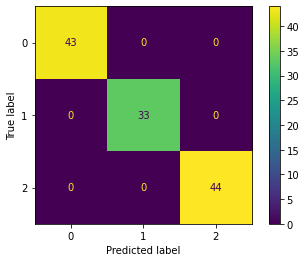

In [45]:
plot_confusion_matrix(log_fitdos,X_traindos,y_pred_traindos);

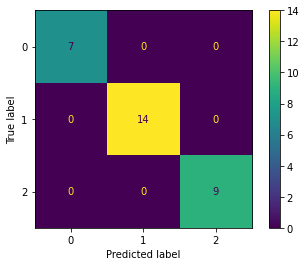

In [46]:

plot_confusion_matrix(log_fitdos,X_testdos,y_pred_testdos);

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.